In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import math
import seaborn as sns
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize
x_train = x_train / 255
x_test = x_test / 255

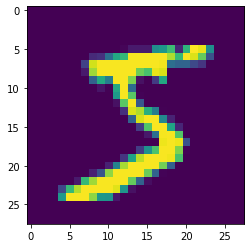

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

5

In [6]:
# Reshaping for convolution
IMG_SIZE = 28
x_train_rs = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test_rs = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_train_rs.shape


(60000, 28, 28, 1)

In [7]:
x_test_rs.shape

(10000, 28, 28, 1)

In [8]:
# CNN
model = Sequential([
    
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train_rs, y_train, epochs=5, validation_split = 0.3)


Epoch 1/5
1313/1313 [==============================] - 60s 29ms/step - loss: 0.6239 - accuracy: 0.7929 - val_loss: 0.1051 - val_accuracy: 0.9681
Epoch 2/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.1014 - accuracy: 0.9696 - val_loss: 0.0931 - val_accuracy: 0.9717
Epoch 3/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0704 - accuracy: 0.9774 - val_loss: 0.0778 - val_accuracy: 0.9761
Epoch 4/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0625 - val_accuracy: 0.9826
Epoch 5/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0711 - val_accuracy: 0.9796


In [9]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [10]:
test_loss, test_acc = model.evaluate(x_test_rs, y_test)
print ("Test loss on 10000 test samples", test_loss)
print ("Validation Accuracy on 10000 test samples", test_acc)


313/313 [==============================] - 2s 8ms/step - loss: 0.0646 - accuracy: 0.9816
Test loss on 10000 test samples 0.06463179737329483
Validation Accuracy on 10000 test samples 0.9815999865531921


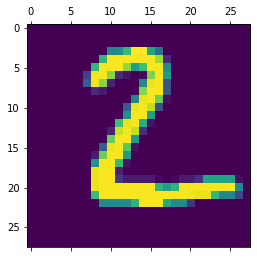

In [11]:
plt.matshow(x_test_rs[1])

In [12]:
y_test[1]

2

In [13]:
y_pred = model.predict( [x_test_rs])
y_pred[1]

array([3.8517719e-06, 7.6376182e-07, 9.9996352e-01, 9.2175906e-06,
       1.4762449e-07, 2.9870630e-09, 1.9752002e-07, 1.5257890e-06,
       2.0592201e-05, 1.3923848e-08], dtype=float32)

In [14]:
np.argmax(y_pred[1])

2

In [15]:
y_label = [np.argmax(i) for i in y_pred]
y_label[1]

2

In [16]:
confusion_matrix = math.confusion_matrix(labels = y_test, predictions = y_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 948,    1,    3,    0,   13,    3,    4,    3,    3,    2],
       [   0, 1125,    3,    4,    1,    0,    0,    2,    0,    0],
       [   0,    2, 1014,    1,    1,    0,    1,   10,    3,    0],
       [   0,    0,    4,  996,    0,    5,    0,    3,    2,    0],
       [   0,    1,    0,    0,  978,    0,    1,    1,    0,    1],
       [   1,    0,    1,    6,    0,  880,    1,    1,    2,    0],
       [   2,    3,    0,    0,   12,    5,  931,    0,    5,    0],
       [   0,    1,   12,    1,    0,    1,    0, 1011,    2,    0],
       [   0,    0,    2,    0,    2,    0,    0,    1,  969,    0],
       [   1,    0,    0,    1,   16,   11,    0,    5,   11,  964]])>

Text(87.0, 0.5, 'y_test')

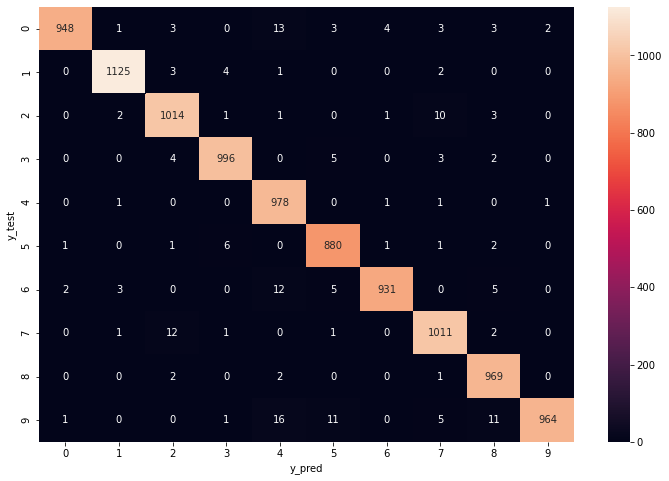

In [17]:
plt.figure(figsize = (12,8 ))
sns.heatmap(confusion_matrix, annot=True, fmt= 'd')
plt.xlabel('y_pred')
plt.ylabel('y_test')

(287, 445, 3)

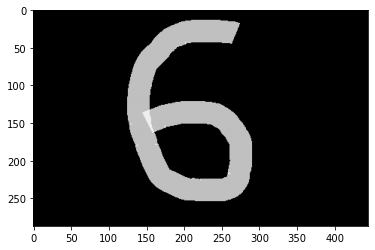

In [18]:
img_hand_written = cv2.imread('6.png')
plt.imshow(img_hand_written)
img_hand_written.shape

(287, 445)

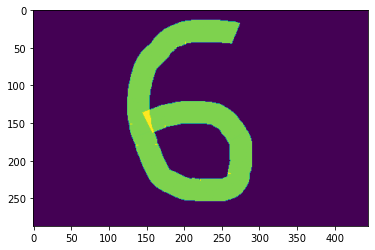

In [19]:
img_gray = cv2.cvtColor(img_hand_written,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
img_gray.shape

(28, 28)

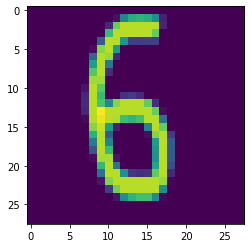

In [20]:
img_resized=cv2.resize(img_gray,(28,28), interpolation = cv2.INTER_AREA)
plt.imshow(img_resized)
img_resized.shape

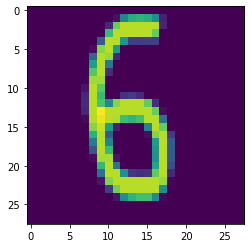

In [21]:
# Normalize
img_new = img_resized/255
plt.imshow(img_new)
# img_new

In [22]:
img_new = np.array(img_new).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
img_new.shape

(1, 28, 28, 1)

In [23]:
predictions = model.predict(img_new)
print(np.argmax(predictions))

6


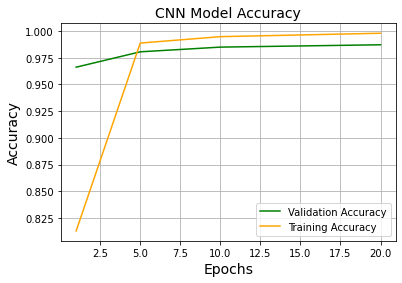

In [24]:
import matplotlib.pyplot as plt
Epochs = [1, 5, 10, 20]
Training_Accuracy = [0.8128, 0.9888, 0.9948, 0.9980]
Validation_Accuracy = [0.9662, 0.9806, 0.9850, 0.9872]
Training_loss = [0.5714, 0.0344, 0.0155, 0.0070]
Validation_loss = [0.1102, 0.0706, 0.0591, 0.0609]
plt.plot(Epochs, Validation_Accuracy, color = 'green', label = 'Validation Accuracy' )
plt.plot(Epochs, Training_Accuracy, color = 'orange', label = 'Training Accuracy' )
plt.title('CNN Model Accuracy' , fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()

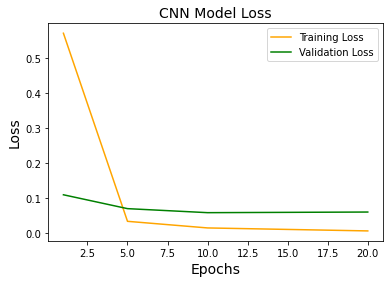

In [25]:
plt.plot(Epochs, Training_loss, color = 'orange', label = 'Training Loss' )
plt.plot(Epochs, Validation_loss, color = 'green', label = 'Validation Loss' )
plt.title('CNN Model Loss' , fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.legend()